In [640]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential 


In [641]:
from tensorflow.keras.layers import Dense,Flatten

In [642]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [643]:
df = pd.read_csv('heart.csv')
df.describe()
print((df.columns))

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [644]:
model = keras.models.Sequential(
    [
    keras.Input(shape=(13,)),           
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [645]:
X = df.iloc[:, :-1].values     
y = df.iloc[:, -1].values
y = y.reshape(-1, 1)   

In [646]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42, stratify=y)
print(x_train.shape)
print(y_train.shape)

(242, 13)
(242, 1)


In [647]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [648]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [649]:
history = model.fit(x_train,y_train,epochs=30,batch_size=40,validation_split=0.2)
y_pred = model.predict(x_test)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.4575 - loss: 0.7720 - val_accuracy: 0.4490 - val_loss: 0.6966
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4810 - loss: 0.7956 - val_accuracy: 0.7347 - val_loss: 0.6539
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5265 - loss: 0.7095 - val_accuracy: 0.7959 - val_loss: 0.6267
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5123 - loss: 0.6929 - val_accuracy: 0.8163 - val_loss: 0.6029
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6138 - loss: 0.6654 - val_accuracy: 0.8367 - val_loss: 0.5789
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5920 - loss: 0.6372 - val_accuracy: 0.8163 - val_loss: 0.5516
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6665 - loss: 0.6437 - val_accuracy: 0.8367 - val_loss: 0.5226
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6960 - loss: 0.6091 - val_accuracy: 0.8163 - val_loss: 0.4942

In [650]:
y_pred = (y_pred > 0.5).astype(int)
print(accuracy_score(y_pred,y_test))

0.8032786885245902


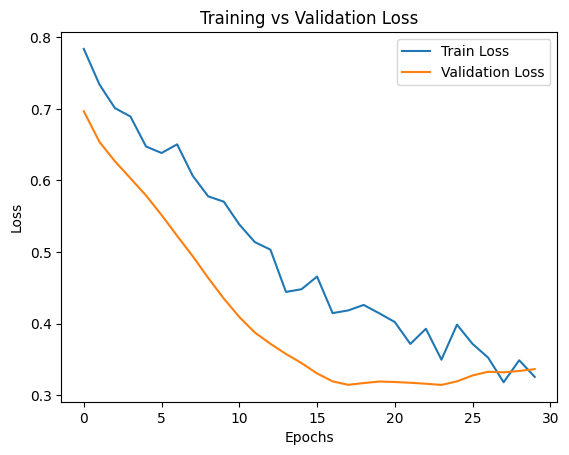

In [651]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()